# scRNAseq_keloid_sampleNF3_do_seurat

In [1]:
rm(list=ls())
gc()
library(Seurat)

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,532330,28.5,1200052,64.1,641780,34.3
Vcells,991474,7.6,8388608,64.0,1754429,13.4


In [2]:
setwd("/Project_dirctory/cellRanger_wd/NF3/outs/filtered_feature_bc_matrix")

In [3]:
NF3.counts <- Read10X(data.dir = getwd())

In [5]:
dobultes=read.table("doubletsRes.txt",header=F,sep="\t")
str(dobultes)
dobultes[is.na(dobultes[,1]),1]=1
which(is.na(dobultes[,1])>0)
sum(dobultes[,1])
#170
dobultesIndex=dobultes[,1]>0
NF3.counts.noDoublet=NF3.counts[,!dobultesIndex]
dim(NF3.counts.noDoublet)

'data.frame':	7448 obs. of  1 variable:
 $ V1: num  0 0 0 0 0 0 0 0 0 0 ...


integer(0)

[1] 240

[1] 33538  7208

In [7]:
NF3 <- CreateSeuratObject(counts = NF3.counts.noDoublet,project = "NF3", min.cells = 3, min.features = 200)

In [8]:
NF3

An object of class Seurat 
20805 features across 6060 samples within 1 assay 
Active assay: RNA (20805 features)

In [9]:
NF3[["percent.mt"]] <- PercentageFeatureSet(NF3, pattern = "^MT-")

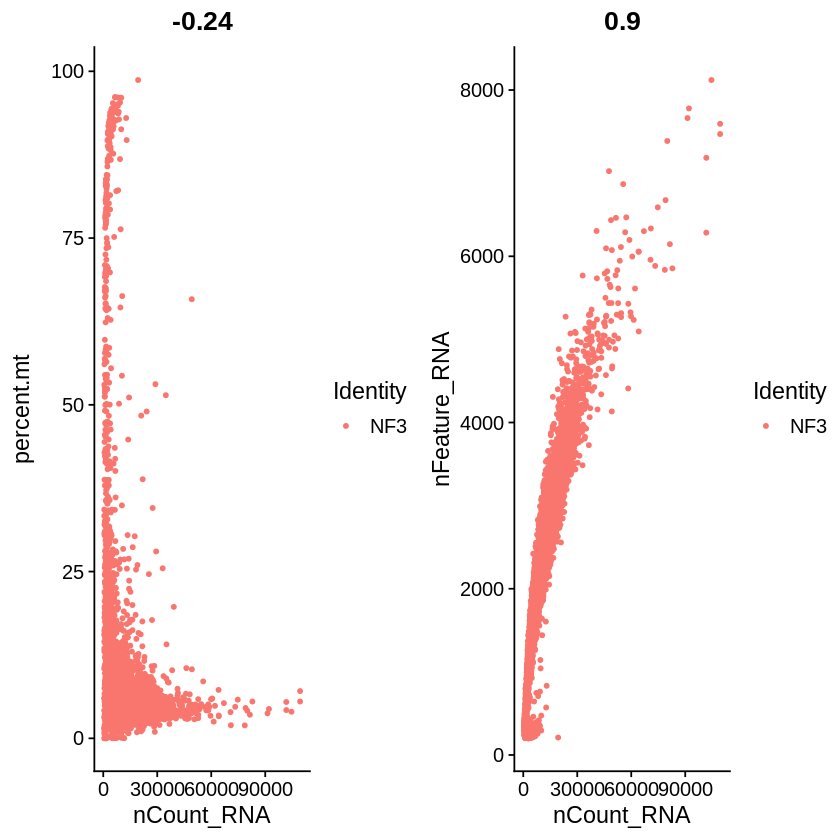

In [10]:
plot1 <- FeatureScatter(NF3, feature1 = "nCount_RNA", feature2 = "percent.mt")
plot2 <- FeatureScatter(NF3, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
CombinePlots(plots = list(plot1, plot2))

In [11]:
NF3 <- subset(NF3, subset = nFeature_RNA > 1000 & nFeature_RNA < 6000 & percent.mt < 15)

In [12]:
NF3

An object of class Seurat 
20805 features across 5103 samples within 1 assay 
Active assay: RNA (20805 features)

In [13]:
NF3 <- NormalizeData(NF3, normalization.method = "LogNormalize", scale.factor = 10000)
NF3 <- FindVariableFeatures(NF3, selection.method = "vst", nfeatures = 2000)
NF3 <- ScaleData(NF3, verbose = FALSE)
NF3 <- RunPCA(NF3, npcs = 30, verbose = FALSE)
NF3 <- RunUMAP(NF3, reduction = "pca", dims = 1:15)
NF3 <- FindNeighbors(NF3, dims = 1:15)
NF3 <- FindClusters(NF3, resolution = 0.5)
NF3 <- RunTSNE(object = NF3, dims.use = 1:15, do.fast = TRUE)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”08:18:20 UMAP embedding parameters a = 0.9922 b = 1.112
08:18:20 Read 5103 rows and found 15 numeric columns
08:18:20 Using Annoy for neighbor search, n_neighbors = 30
08:18:20 Building Annoy index with metric = cosine, n_trees = 50
0%   10   20   30   40   50   60   70   80   90   100%
[----|----|----|----|----|----|----|----|----|----|
**************************************************|
08:18:21 Writing NN index file to temp file /tmp/RtmpjJxbTQ/file211a6f59ad94
08:18:21 Searching Annoy index using 1 thread, search_k = 3000
08:18:23 Annoy recall = 100%
08:18:23 Commencing smooth kNN distance calibration using 1 thread
08:18:24 Initializing from normalized Laplacian + noise
08:18:26 Commencing optimizatio

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 5103
Number of edges: 163711

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9236
Number of communities: 16
Elapsed time: 0 seconds



********************************************************
Note: As of version 1.0.0, cowplot does not change the
  default ggplot2 theme anymore. To recover the previous
  behavior, execute:
  theme_set(theme_cowplot())
********************************************************

Warning message:
“Using `as.character()` on a quosure is deprecated as of rlang 0.3.0.
Please use `as_label()` or `as_name()` instead.
This warning is displayed once per session.”

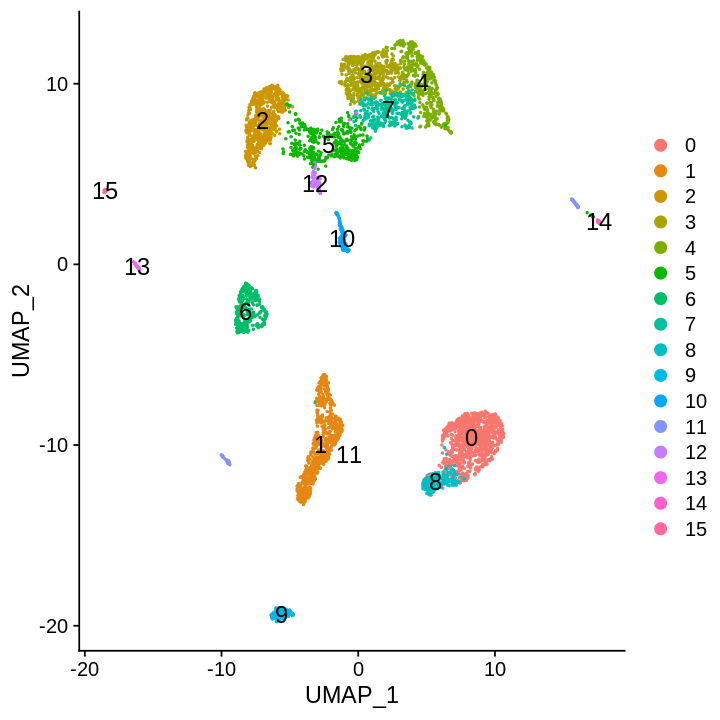

In [14]:
library(cowplot)
options(repr.plot.width=6,repr.plot.height=6)
DimPlot(NF3, reduction = "umap",label = T,label.size = 5)

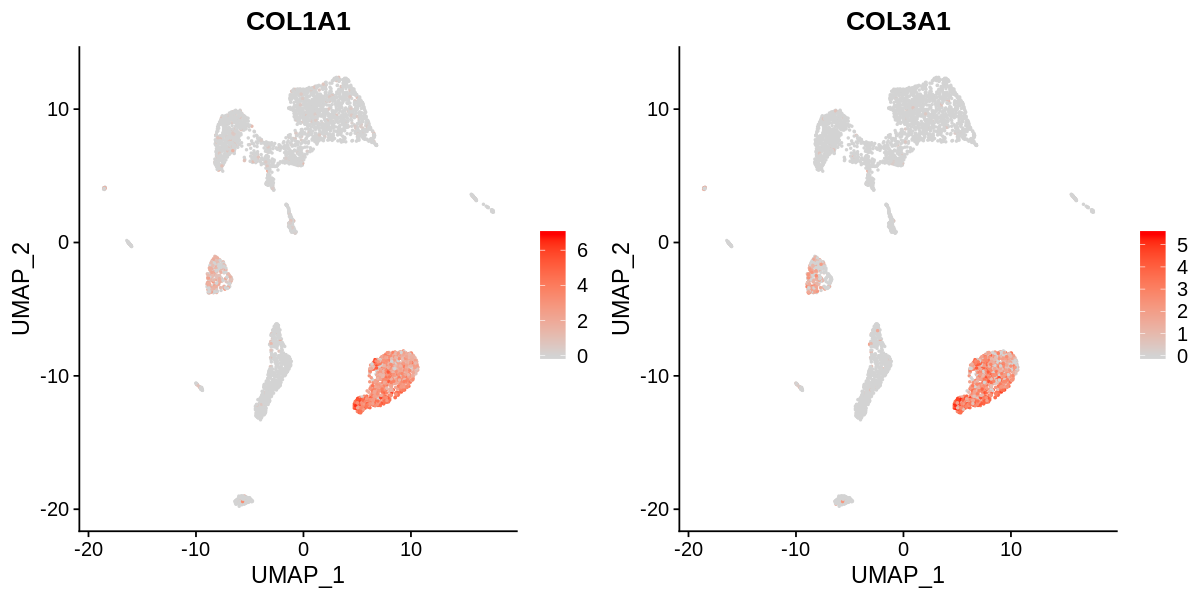

In [16]:
#fibroblast
options(repr.plot.width=10,repr.plot.height=5)
FeaturePlot(NF3, features = c("COL1A1","COL3A1"),nc=2,cols=c("lightgrey", "red"))

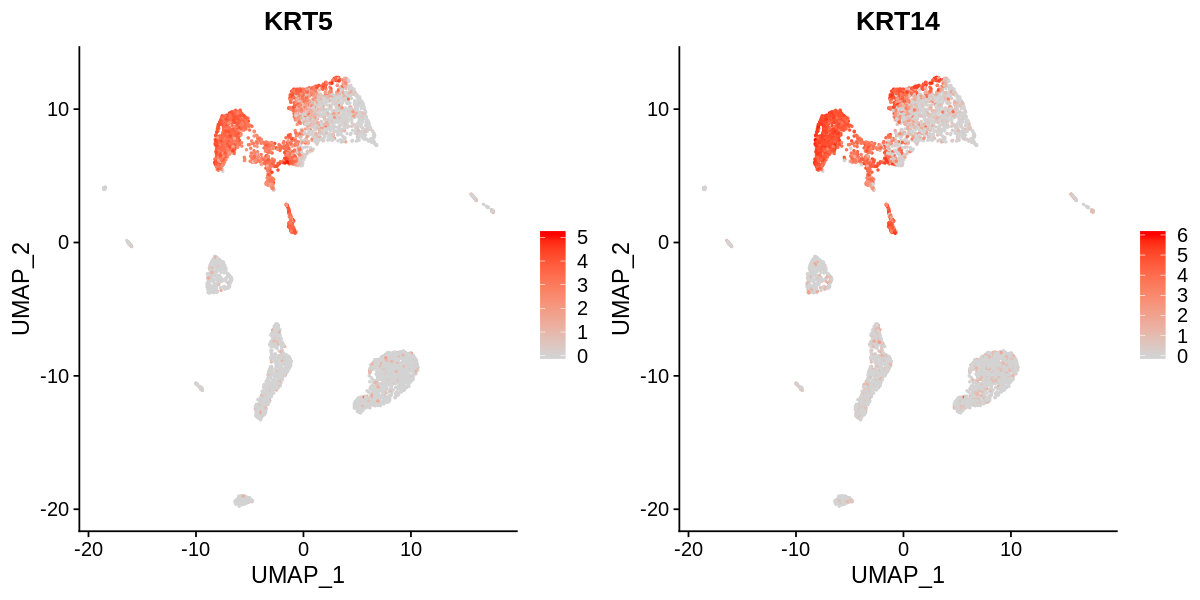

In [17]:
#basal cell (keratinocytes)
options(repr.plot.width=10,repr.plot.height=5)
FeaturePlot(NF3, features = c("KRT5", "KRT14"),cols=c("lightgrey", "red"))

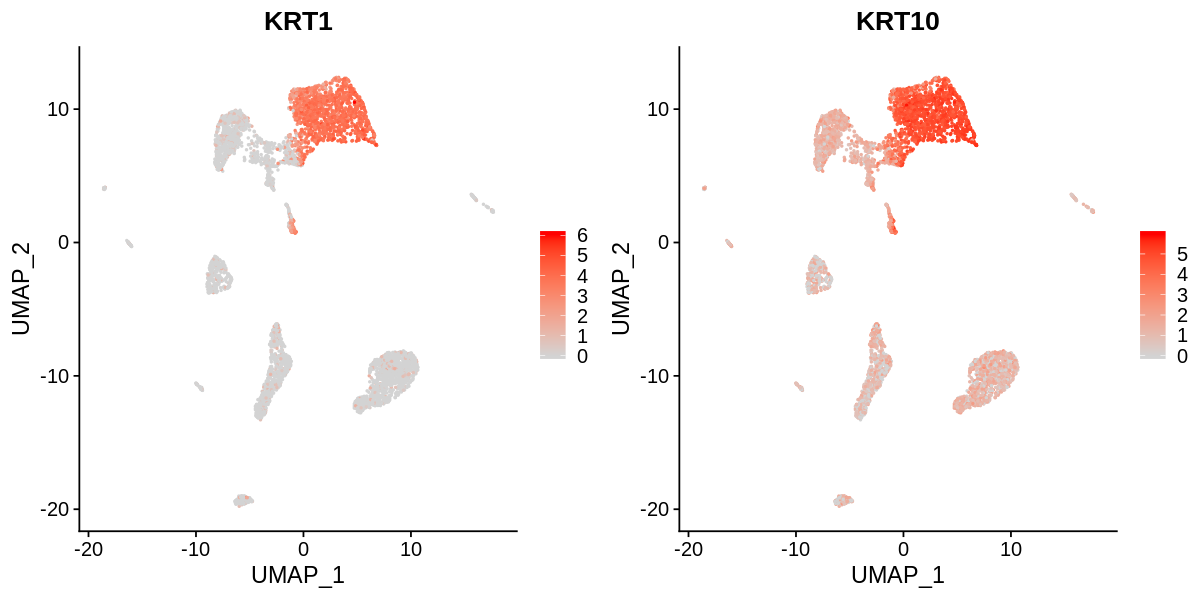

In [18]:
#keratinocytes spinous_cell
options(repr.plot.width=10,repr.plot.height=5)
FeaturePlot(NF3, features = c("KRT1", "KRT10"),cols=c("lightgrey", "red"))

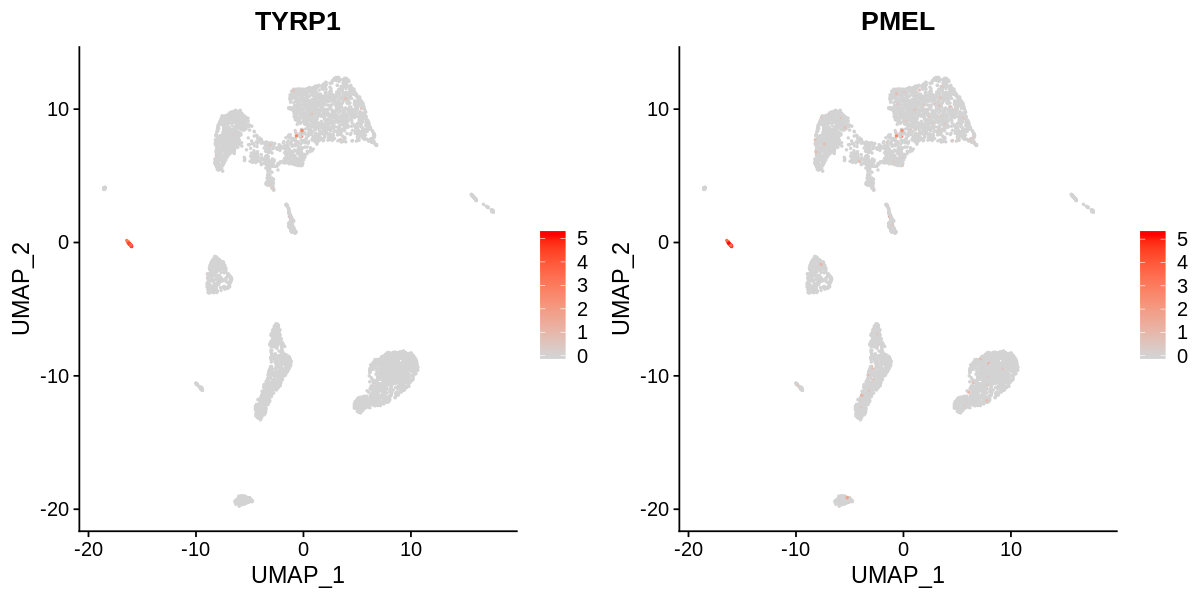

In [20]:
#Melanocytes
options(repr.plot.width=10,repr.plot.height=5)
FeaturePlot(NF3, features = c("TYRP1", "PMEL"),cols=c("lightgrey", "red"))

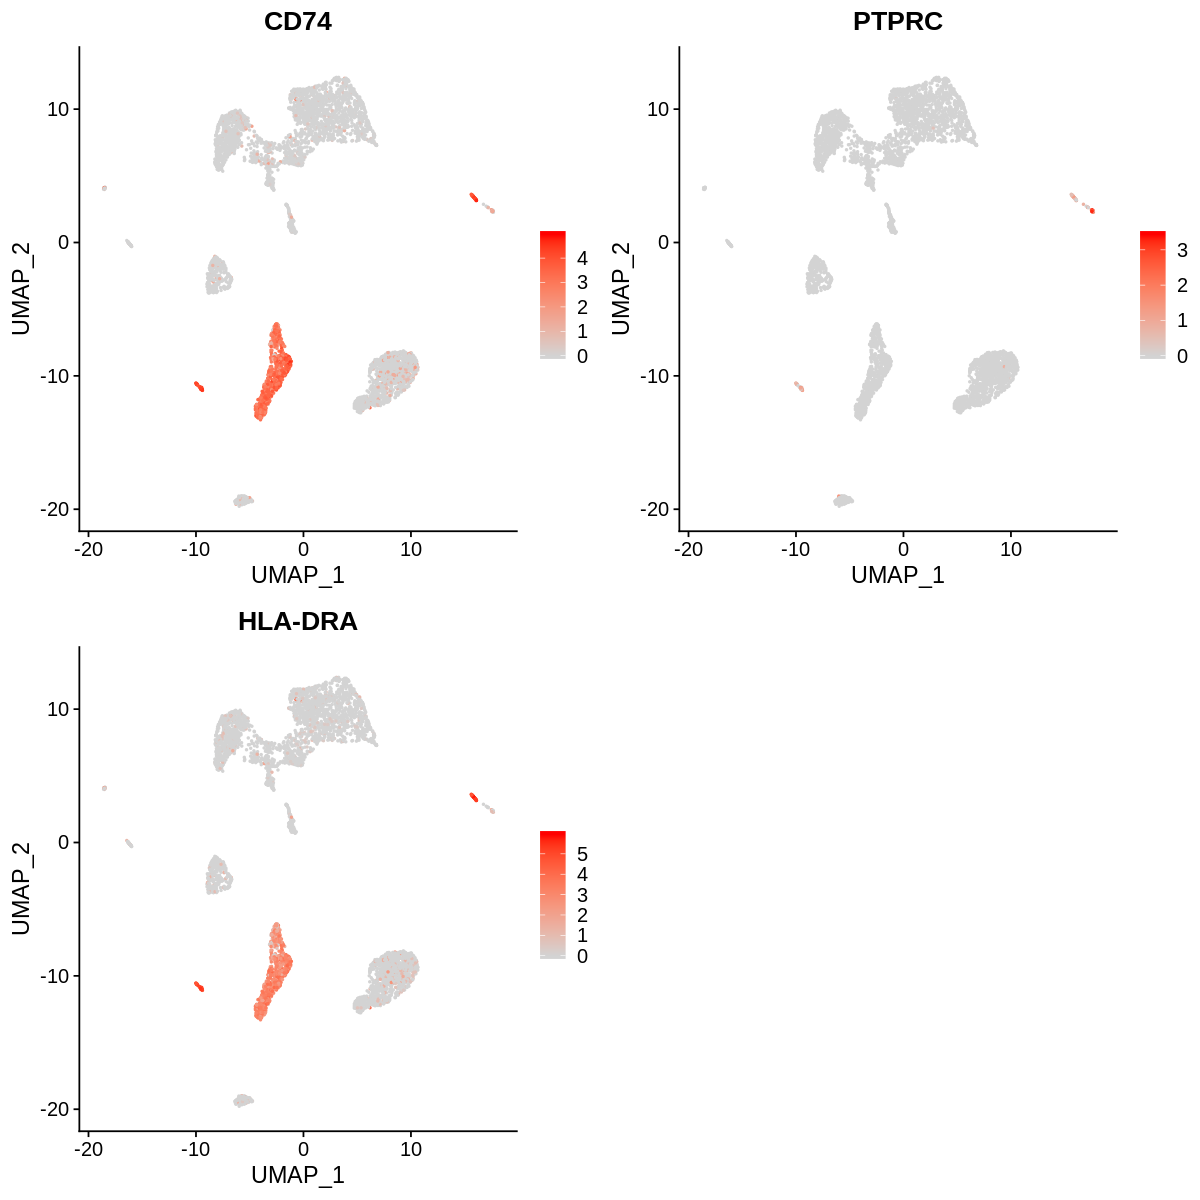

In [21]:
#immune
options(repr.plot.width=10,repr.plot.height=10)
FeaturePlot(NF3, features = c("CD74", "PTPRC","HLA-DRA"),cols=c("lightgrey", "red"))

Warning message in FetchData(object = object, vars = c(dims, "ident", features), :
“The following requested variables were not found: CD38”

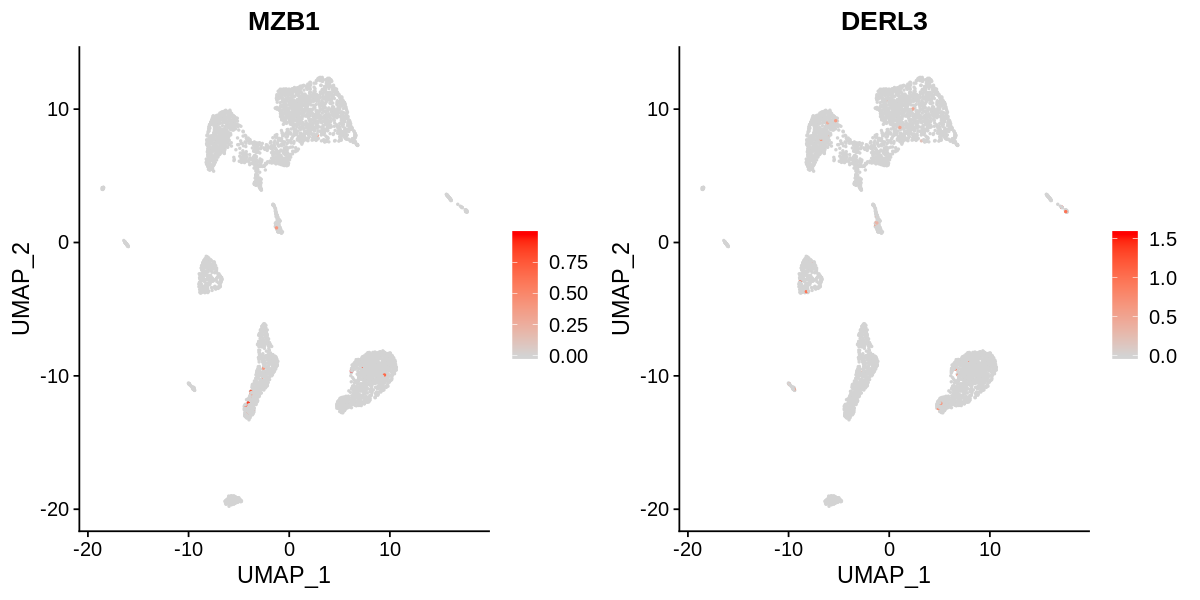

In [23]:
#immune B
options(repr.plot.width=10,repr.plot.height=5)
FeaturePlot(NF3, features = c("CD38","MZB1","DERL3"),cols=c("lightgrey", "red"))

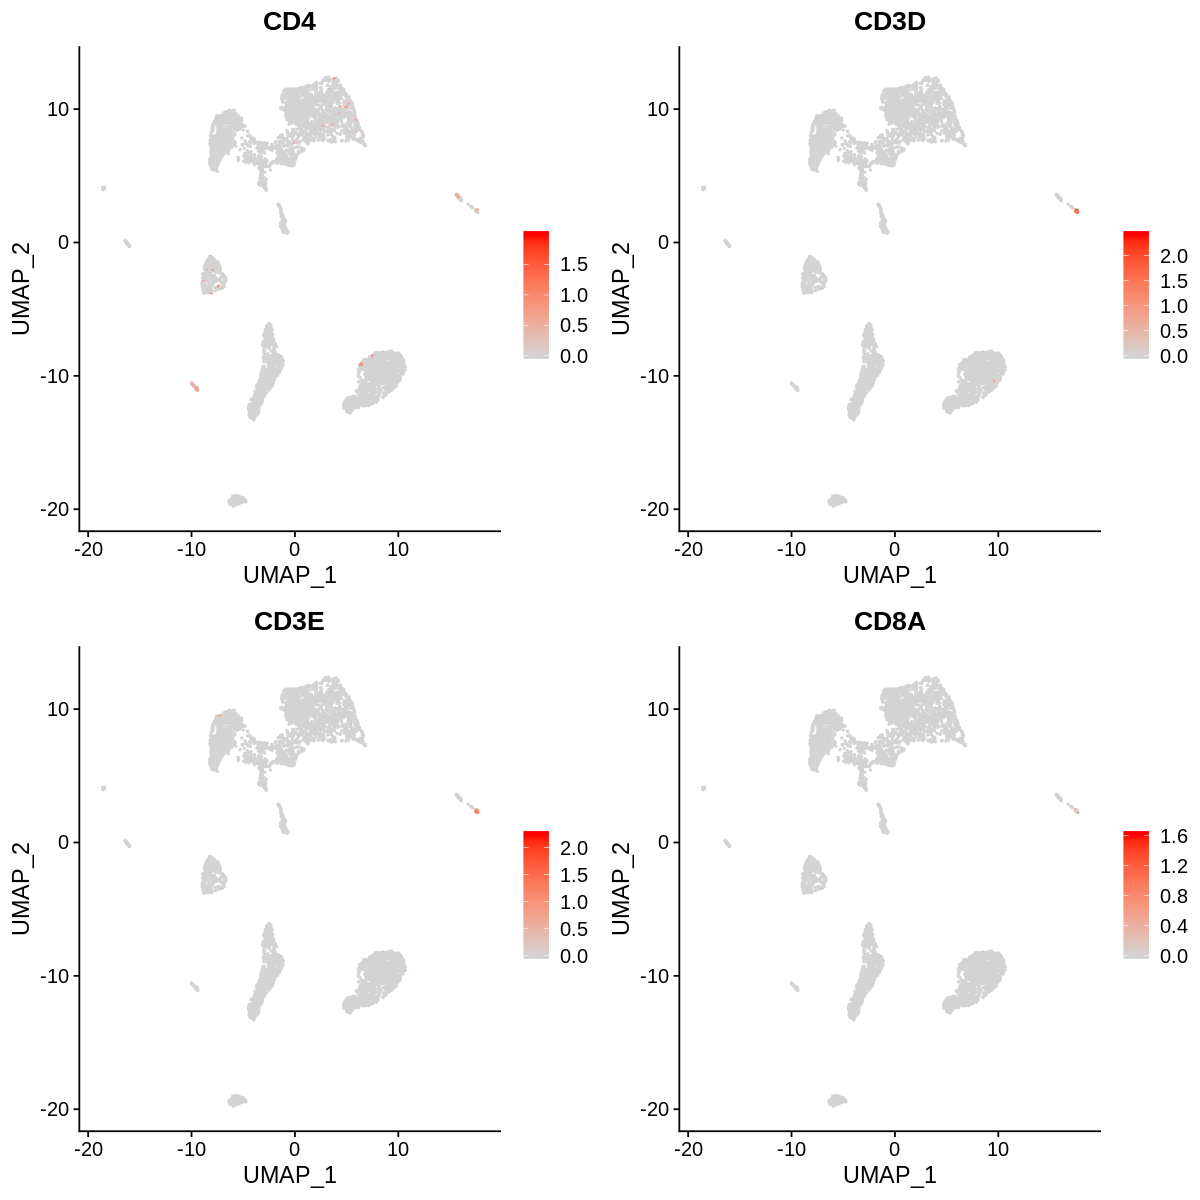

In [24]:
#immune T
options(repr.plot.width=10,repr.plot.height=10)
FeaturePlot(NF3, features = c("CD4","CD3D","CD3E","CD8A"),cols=c("lightgrey", "red"))

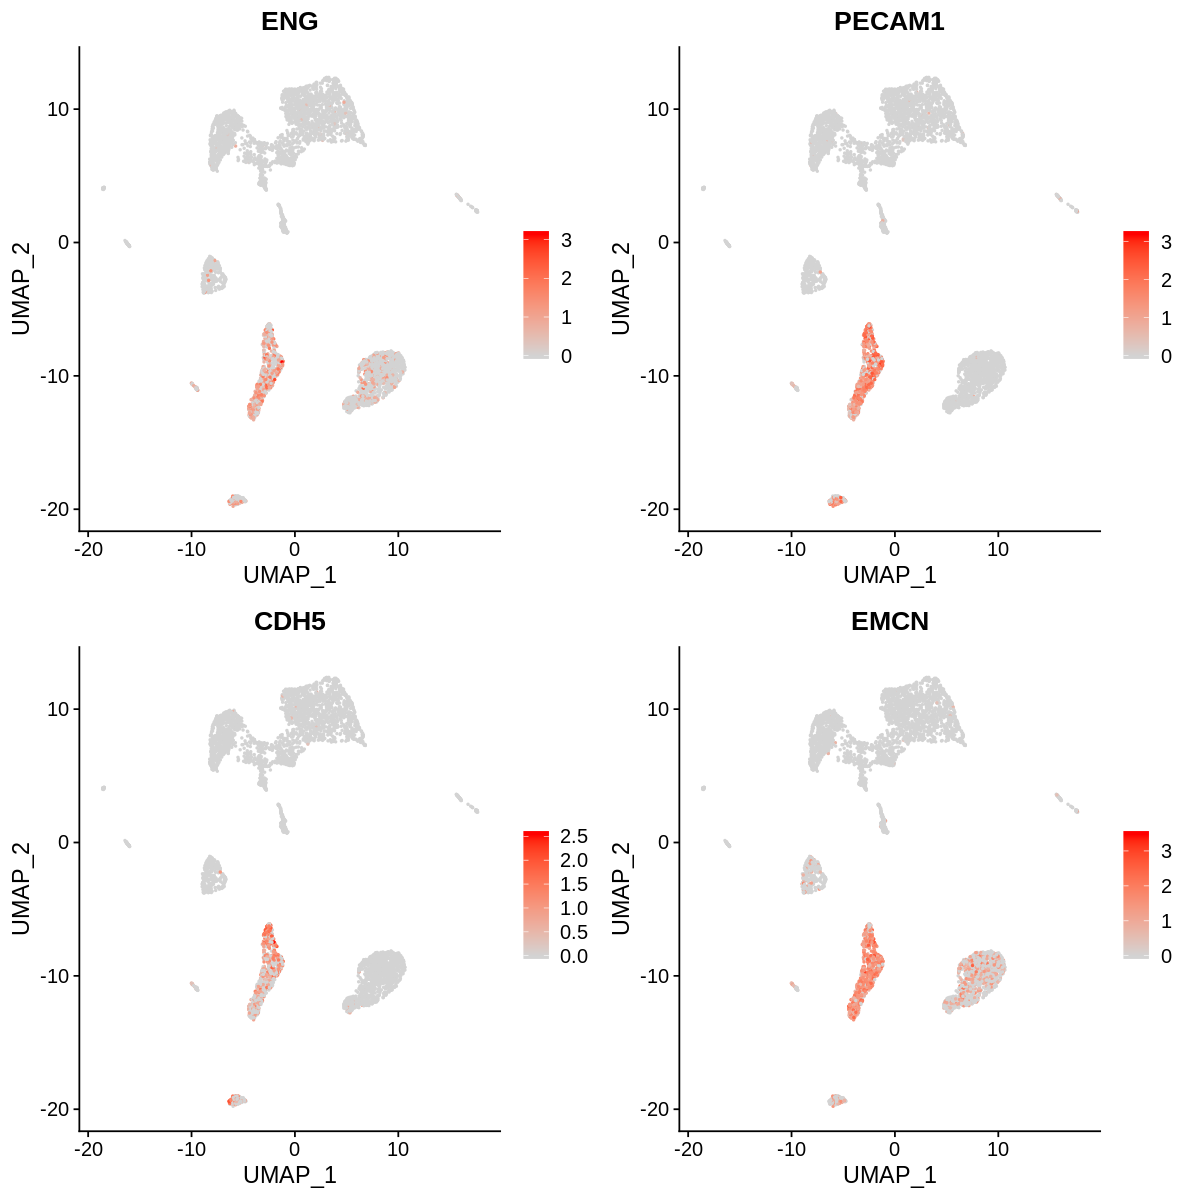

In [25]:
#endothelial cells
options(repr.plot.width=10,repr.plot.height=10)
FeaturePlot(NF3, features = c("ENG","PECAM1","CDH5","EMCN"),cols=c("lightgrey", "red"))

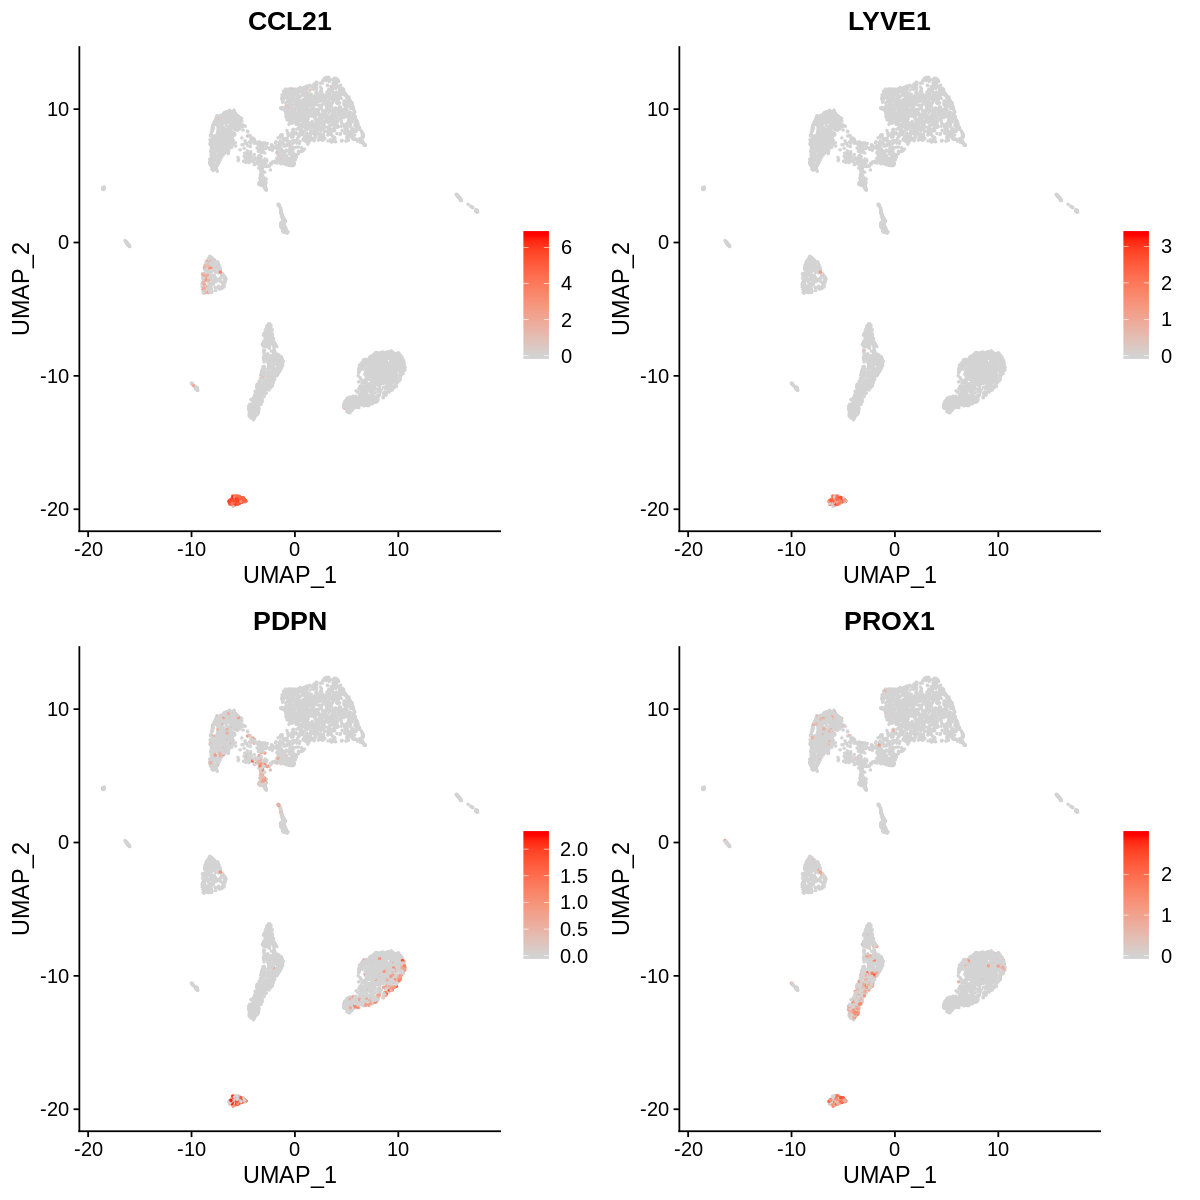

In [26]:
#lymphatic endothelial marker
options(repr.plot.width=10,repr.plot.height=10)
FeaturePlot(NF3, features = c("CCL21","LYVE1","PDPN","PROX1"),cols=c("lightgrey", "red"))

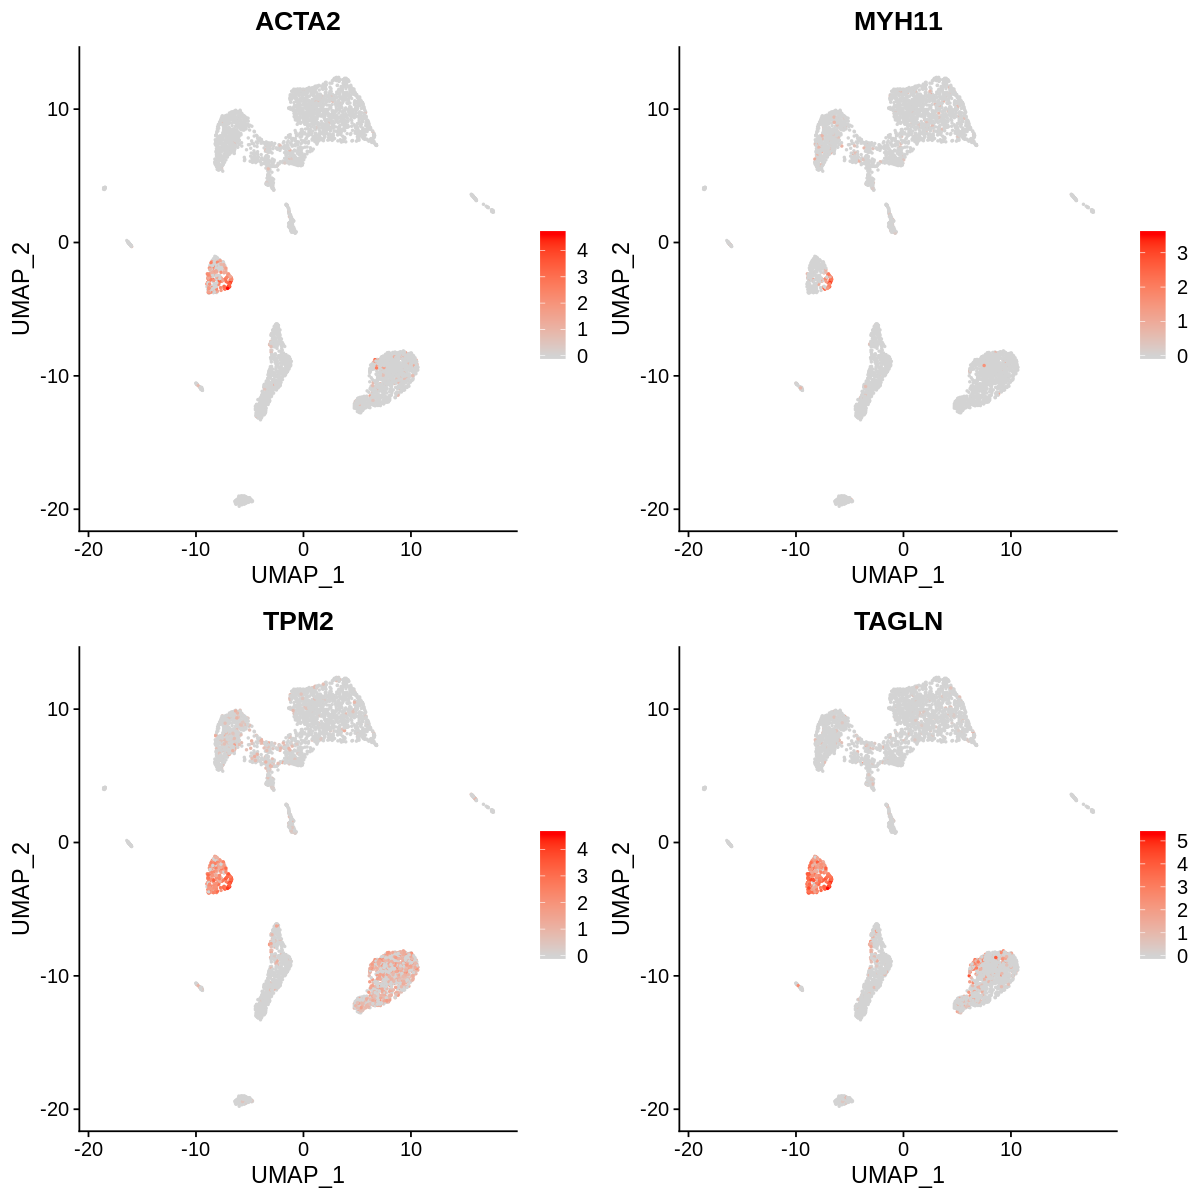

In [27]:
#muscle fiber marker
options(repr.plot.width=10,repr.plot.height=10)
FeaturePlot(NF3, features = c("ACTA2","MYH11","TPM2","TAGLN"),cols=c("lightgrey", "red"))

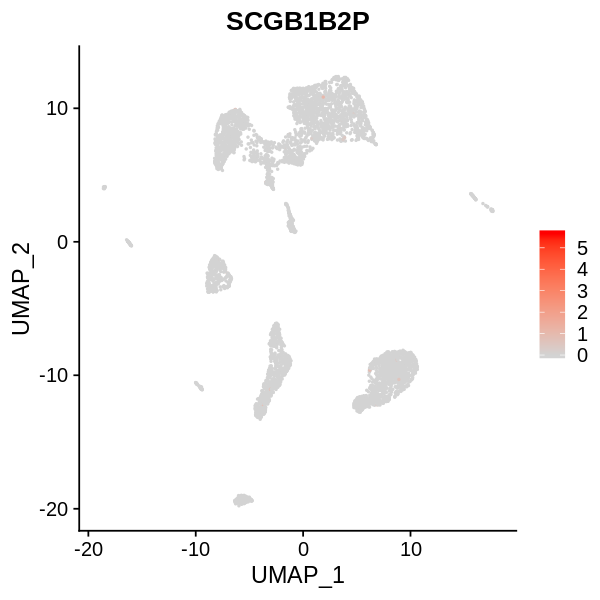

In [28]:
#secretory (glandular) cells
options(repr.plot.width=5,repr.plot.height=5)
FeaturePlot(NF3, features = c("SCGB1B2P"),cols=c("lightgrey", "red"))

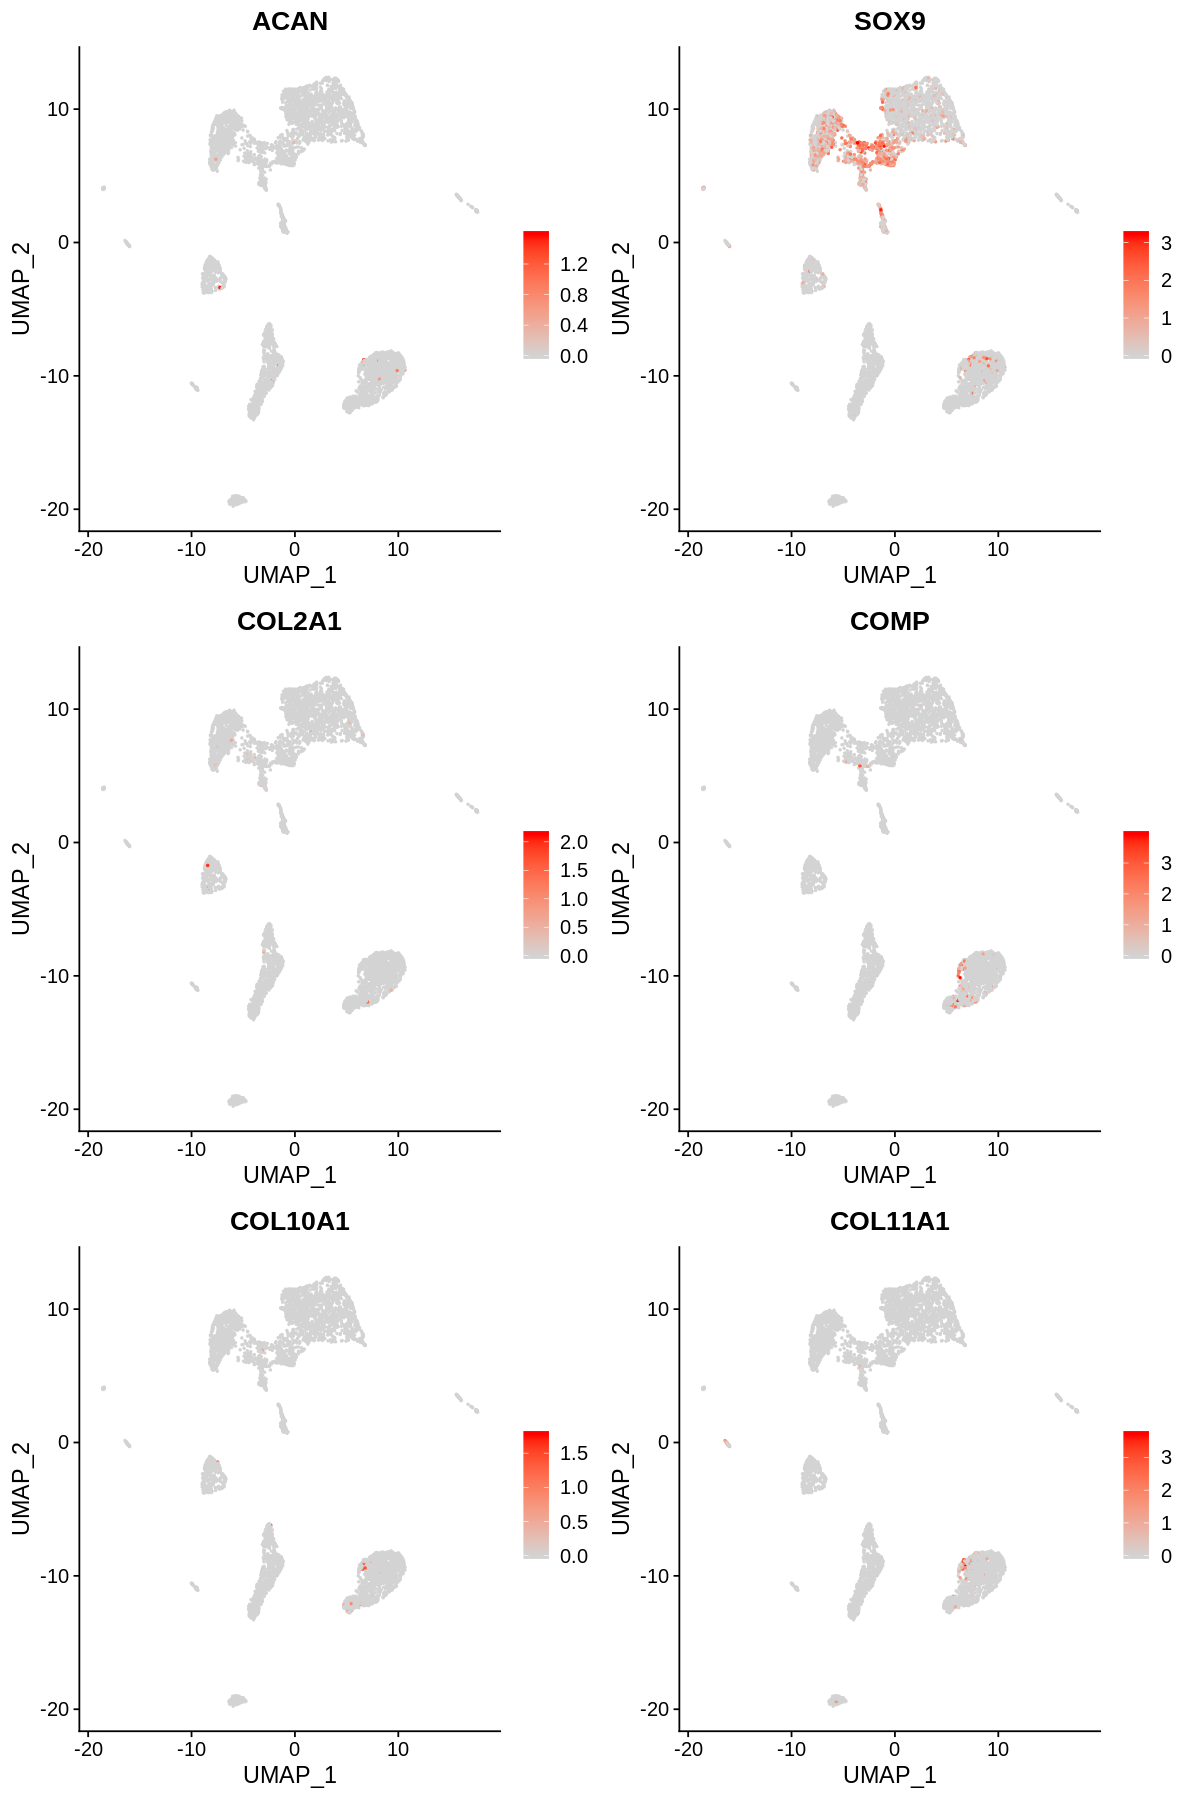

In [29]:
options(repr.plot.width=10,repr.plot.height=15)
FeaturePlot(NF3, features = c("ACAN","SOX9","COL2A1","COMP","COL10A1","COL11A1"),nc=2,cols=c("lightgrey", "red"))

In [31]:
dim(NF3)
NF3$dataset=rep("NF3",ncol(NF3))

[1] 20805  5103

In [32]:
table(Idents(NF3))


  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15 
881 714 663 567 438 429 335 330 211 136 115  95  82  51  31  25 

In [33]:
NF3.fib=subset(NF3,idents = c("0","8"))

In [34]:
NF3.fib

An object of class Seurat 
20805 features across 1092 samples within 1 assay 
Active assay: RNA (20805 features)
 3 dimensional reductions calculated: pca, umap, tsne

In [35]:
setwd("/mnt/dfc_data1/project/hobart/hospital/scRNAseq_keloid/allSample/NF3")

In [36]:
save(NF3,file="NF3.seurat.object.Rdata")

In [37]:
save(NF3.fib,file="NF3.fib.seurat.object.Rdata")

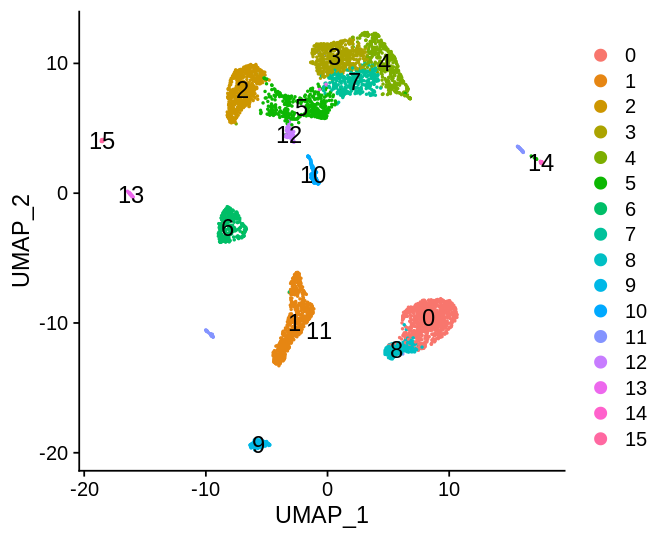

In [39]:
library(cowplot)
options(repr.plot.width=5.5,repr.plot.height=4.5)
DimPlot(NF3, reduction = "umap",label = T,label.size = 5)

In [40]:
new.cluster.id=c("Fibroblast","Endothelial","Keratinocyte","Keratinocyte","Keratinocyte","Keratinocyte","muscle_fiber","Keratinocyte","Fibroblast","Lymphatic_endothelial","Keratinocyte","Immune_cell","Keratinocyte","Melanocytes","Immune_cell","Unknow")
names(new.cluster.id)=levels(NF3)
NF3=RenameIdents(NF3,new.cluster.id)

In [42]:
table(Idents(NF3))


           Fibroblast           Endothelial          Keratinocyte 
                 1092                   714                  2624 
         muscle_fiber Lymphatic_endothelial           Immune_cell 
                  335                   136                   126 
          Melanocytes                Unknow 
                   51                    25 

In [43]:
write.csv(table(Idents(NF3)),"NF3.cluster_cellType_Statis.csv")

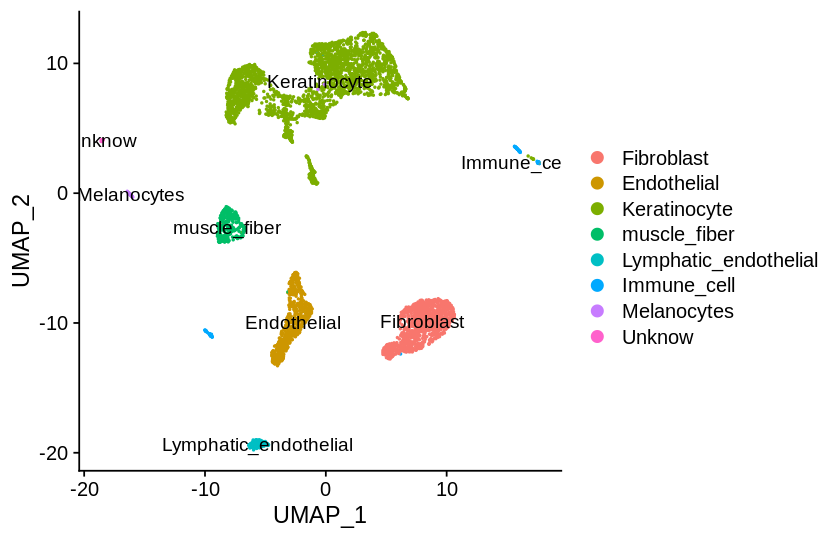

In [44]:
library(cowplot)
options(repr.plot.width=7,repr.plot.height=4.5)
DimPlot(NF3, reduction = "umap",label = T,label.size = 4)